### 4.0 소개 [20201112]

정량적 데이터란 반별 학생 수나 월간 매출, 시험 점수 같이 어떤 것을 측량한 결과를 말한다.

### 4.1 특성 스케일 바꾸기

수치형 특성이 두 값의 범위 안에 놓이도록 스케일을 바꿔야함 

In [3]:
import numpy as np
from sklearn import preprocessing

feature = np.array([[-500.5],[-100.1],[0],[100.1],[900.9]])

In [4]:
feature

array([[-500.5],
       [-100.1],
       [   0. ],
       [ 100.1],
       [ 900.9]])

In [9]:
#스케일러 객체를 만듦
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))

#특성의 스케일을 반환함
scale_Feature = minmax_scale.fit_transform(feature)

In [11]:
scale_Feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

스케일 조정은 머신러닝의 흔한 전처리 작업. 일반적으로 0~1 또는 -1~1 사이이다. 스케일 조정 방법은 여러가지가 있다. 가장 간단한 방법인 minmaxscale이 있는데 특성의 최솟값과 최댓값을 사용하여 일정 범위 안으로 값을 조정한다.

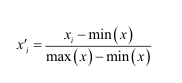

x는 특성 벡터이고 x_i는 특성 x의 개별원소이다. 

### 4.2 특성을 표준화하기

특성의 평균이 0이고 표준편차가 1이 되도록 변환해야 한다.

In [12]:
#특성 생성
x = np.array([[-100.1],[-200.2],[500.5],[600.6],[9000.9]])

In [16]:
#변환기 객체 만들기
scaler = preprocessing.StandardScaler()

In [18]:
#특성을 변환(1)
scaler.fit(x)
standardized2 = scaler.transform(x)
standardized2

array([[-0.58295369],
       [-0.61127466],
       [-0.41302785],
       [-0.38470688],
       [ 1.99196308]])

In [17]:
#특성을 변환(2)
standardized = scaler.fit_transform(x)
standardized

array([[-0.58295369],
       [-0.61127466],
       [-0.41302785],
       [-0.38470688],
       [ 1.99196308]])

주성분 분석에는 표준화가 잘 맞지만 신경망에는 최소-최대 스케일링을 종종 권장하는편이다. 기본적으로 특별한 이유가 없다면 표준화를 권장함

In [20]:
print("평균", round(standardized.mean()))
print("표준편차", round(standardized.std()))

평균 0.0
표준편차 1.0


데이터의 이상치가 많다면 특성의 평균과 표준편차에 영향을 미치기 때문에 이 경우 중간값과 사분위 범위를 사용해 스케일을 조정함<br>
RobustScaler은 데이터에서 중간값을 배고 IQR로 나누는 스케일링 방법이다.

In [21]:
#변환기 객체
robust_scaler = preprocessing.RobustScaler()

In [22]:
#특성 변환
robust_scaler.fit_transform(x)

array([[-0.85714286],
       [-1.        ],
       [ 0.        ],
       [ 0.14285714],
       [12.13129727]])

QuantileTransformer는 훈련 데이터를 1000개의 분위로 나누어 0~1 사이에 고르게 분포시키는 방법, 이상치의 영향을 줄이는 효과가 있음.

In [25]:
preprocessing.QuantileTransformer().fit_transform(x)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([[0.25],
       [0.  ],
       [0.5 ],
       [0.75],
       [1.  ]])

### 4.3 정규화하기

샘플의 특성값을 전체 길이가 1인 단위 norm이 되도록 변환시키자

In [26]:
from sklearn.preprocessing import Normalizer
features = np.array([[0.5, 0.5],[1.1, 3.4],[1.5, 20.2],[1.63, 34.4],[10.9, 3.3]])

In [29]:
#변환기 객체 생성
normalizer = Normalizer(norm="l2")

In [30]:
normalizer.transform(features)

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

normalizer은 세가지 norm 옵션을 제공함. l1, l2, l무한대

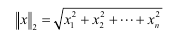
l2는 직선의 거리

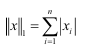 l1은 사람이 도로를 따라 걷는 것

In [34]:
#l1은 샘플 특성값의 합을 1로 만든다
features_l1_norm = Normalizer(norm="l1").transform(features)
features_l1_norm

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

정규화는 행별이기 때문에 굳이 fit 할 필요는 없음

In [37]:
#l무한대를 써주려면 max를 옵션에 써주면 된다.
# 이 옵션은 단순히 각 행의 최댓값으로 행의 값을 나눈다.
Normalizer(norm="max").transform(features)

array([[1.        , 1.        ],
       [0.32352941, 1.        ],
       [0.07425743, 1.        ],
       [0.04738372, 1.        ],
       [1.        , 0.30275229]])

### 4.4 다항 특성과 교차항 특성 생성하기

In [38]:
from sklearn.preprocessing import PolynomialFeatures

features = np.array([[2,3],[2,3],[2,3]])

In [39]:
polynomial_interaction = PolynomialFeatures(degree=2, include_bias=False)

In [40]:
polynomial_interaction.fit_transform(features)

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.]])

In [41]:
# degree=3은 3제곱까지 새로운 특성을 만든다. 교차항을 포함시킨다.
polynomial_interaction = PolynomialFeatures(degree=3, include_bias=False)
polynomial_interaction.fit_transform(features)

array([[ 2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.],
       [ 2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.],
       [ 2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [45]:
#interaction_only를 True로 지정하면 교차항 특성만 만들 수 있다.
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction.fit_transform(features)

array([[2., 3., 6.],
       [2., 3., 6.],
       [2., 3., 6.]])

In [47]:
#include_bias 매개변수의 기본값은 True이다.
polynomial_bias = PolynomialFeatures(degree=2).fit(features)
polynomial_bias.fit_transform(features)

array([[1., 2., 3., 4., 6., 9.],
       [1., 2., 3., 4., 6., 9.],
       [1., 2., 3., 4., 6., 9.]])

In [48]:
#get_feature_names 는 특성 변환 식을 이름으로 변환
polynomial_bias.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

### 4.5 특성 변환하기

하나 이상의 특성에 사용자 정의 변환을 적용시키기

In [49]:
from sklearn.preprocessing import FunctionTransformer

features = np.array([[2,3],[2,3],[2,3]])

In [50]:
def add_ten(x) :
    return x + 10

In [51]:
ten_transformer = FunctionTransformer(add_ten)

In [52]:
ten_transformer.transform(features)

array([[12, 13],
       [12, 13],
       [12, 13]])

In [53]:
import pandas as pd
df = pd.DataFrame(features, columns=['features_1','features_2'])
df.apply(add_ten)

,features_1,features_2
0,12,13
1,12,13
2,12,13


옵션 validate는 기본 False이다. False이면 일차원 배열에도 적용할 수 있다.

ColumnTransformer를 사용하면 특성 배열이나 데이터프레임의 열마다 다른 변환을 적용할 수 있다.

In [61]:
from sklearn.compose import ColumnTransformer

def add_hundred(x):
    return x + 100

ct  = ColumnTransformer([("add_ten", FunctionTransformer(add_ten,validate=True),['features_1']),
                         ("add_hundred",FunctionTransformer(add_hundred,validate=True),['features_2'])])

In [62]:
ct.fit_transform(df)

array([[ 12, 103],
       [ 12, 103],
       [ 12, 103]])

### 4.6 이상치 감지하기

데이터를 둘러싼 타원을 그려서 원 안은 정상치(1), 원 밖은 이상치(-1)로 분류

In [64]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

#모의 데이터 만들기
features, _ = make_blobs(n_samples = 10, n_features = 2,
                         centers = 1, random_state = 1)

In [65]:
#첫 번째 샘플을 극단적인 값으로 바꾼다.
features[0,0] = 10000
features[0,1] = 10000

#이상치 감지 객체를 만든다.
outlier_detector = EllipticEnvelope(contamination=.1)

In [66]:
#감지 객체를 훈련시킴
outlier_detector.fit(features)

EllipticEnvelope()

In [67]:
outlier_detector.predict(features)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

contamination의 주요 단점은 이상치의 비율을 정해야한다는 것임.

샘플을 전체적으로 보는 것보다 개별 특성에서 IQR을 사용해 극단적인 값을 구별할 수 있다.

In [68]:
feature = features[:,0]

In [71]:
def indicies_of_outliers(x) :
    q1, q3 = np.percentile(x, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound)|(x < lower_bound))

In [73]:
indicies_of_outliers(feature)

(array([0], dtype=int64),)

### 4.7 이상치 다루기

In [74]:
import pandas as pd

houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

#### 1) 이상치 삭제

In [75]:
houses[houses['Bathrooms'] < 20]

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


#### 2) 이상치 표시 후 특성의 하나로 포함

In [76]:
houses['Outlier'] = np.where(houses['Bathrooms'] < 20, 0, 1)
houses

,Price,Bathrooms,Square_Feet,Outlier
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


#### 3) 이상치의 영향이 줄어들도록 특성 변환

In [78]:
houses['Log_Of_Square_Feet'] = [np.log(x) for x in houses['Square_Feet']]
houses

,Price,Bathrooms,Square_Feet,Outlier,Log_Of_Square_Feet
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


이상치가 있으면 평균과 분산에 영향을 주기 때문에 이상치가 있다면 표준화가 적절하지 않다. RobustScaler와 같이 이상치에 민감하지 않은 스케일링 방법을 사용하는 것이 좋을듯.

### 4.8 특성 이산화하기

이산화는 수치 특성을 범주형처럼 다루어야 할 때 쓰는 전략

데이터는 두 가지 방법으로 나눌 수 있다. 첫 번째는 임곗값에 따라 특성을 둘로 나누는 방법

In [79]:
from sklearn.preprocessing import Binarizer

age = np.array([[6],[12],[20],[36],[65]])

In [86]:
binarizer = Binarizer(18)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=18 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [85]:
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

두번째는 수치 특성을 여러 임곗값에 따라 나누는 방법

In [83]:
#특성 나누기
# 20 미만 , 30미만, 64미만 64이상 으로 나눈 거임
#  right = True를 쓰면 범위가 20 이하가 된다.
# Binarizer처럼 두 개의 구간으로 나누려면 숫자 하나만 써주면 된다.
np.digitize(age, bins=[20,30,64])

array([[0],
       [0],
       [1],
       [2],
       [3]], dtype=int64)

연속적인 특성값을 여러 구간으로 나누어주는 KBinsDiscretizer 클래스

In [87]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(4, encode = 'ordinal', strategy='quantile')
kb.fit_transform(age)

array([[0.],
       [1.],
       [2.],
       [3.],
       [3.]])

In [88]:
#onehot-dense : 원핫 인코딩된 밀집 배열을 반환
# 연속된 값을 원핫 인코딩으로 만들면 범주형 특성으로 다루기 편리
kb = KBinsDiscretizer(4, encode = 'onehot-dense', strategy='quantile')
kb.fit_transform(age)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [89]:
# quantile 은 각 구간에 포함된 샘플 개수가 비슷하도록 만든다.
# uniform 은 구간의 폭이 동일하도록 만든다.
kb = KBinsDiscretizer(4, encode = 'onehot-dense', strategy='uniform')
kb.fit_transform(age)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [90]:
#구간 확인
kb.bin_edges_

array([array([ 6.  , 20.75, 35.5 , 50.25, 65.  ])], dtype=object)

### 4.9 군집으로 샘플을 그룹으로 묶기

k개의 그룹이 있다는 것을 안다면 k-평균-군집을 사용해 비슷한 샘플을 그룹으로 묶을 수 있다. 각 샘플의 소속 그룹이 새로운 특성이 된다.

In [91]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

features, _ = make_blobs(n_samples = 50, n_features = 2,
                         centers = 3, random_state = 1)

In [94]:
dataframe = pd.DataFrame(features, columns = ['feature_1','feature_2'])

#k-평균 군집 모델을 만든다.
clusterer = KMeans(3, random_state=0)

In [95]:
clusterer.fit(features)

KMeans(n_clusters=3, random_state=0)

In [97]:
dataframe['Group'] = clusterer.predict(features)
dataframe.head(5)

,feature_1,feature_2,Group
0,-9.877554,-3.336145,2
1,-7.287210,-8.353986,0
2,-6.943061,-7.023744,0
3,-7.440167,-8.791959,0
4,-6.641388,-8.075888,0


### 4.10 누락된 값을 가진 샘플을 삭제하기

In [98]:
features = np.array([[1.1, 11.1],[2.2, 22.2], [3.3, 33.3],[4.4, 44.4],[np.nan,55]])

In [100]:
# ~ 연산자를 사용해 누락된 값이 없는 샘플만 남긴다
features[~np.isnan(features).any(axis=1)]

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4]])

In [101]:
#판다스를 이용해서도 누락된 값이 있는 샘플을 삭제할 수 있다.
dataframe = pd.DataFrame(features, columns=['feature_1','feature_2'])
dataframe.dropna()

,feature_1,feature_2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4


누락된 데이터에는 세가지 종류가 있다.

1) 완전히 랜덤하게 누락(MCAR)<br>
값이 누락될 확률이 모든 것에 독립적이다.<br>
2) 랜덤하게 누락(MAR)<br>
값이 누락될 확률이 완전히 랜덤하지 않고 다른 특성에서 얻는 정보에 의존.<br>
3) 랜덤하지 않게 누락(MNAR)<br>
값이 누락될 확률이 랜덤하지 않고 특성에서 잡지 못한 정보에 의존한다.<br>

### 4.11 누락된 값 채우기

데이타의 양이 작으면 k-최근접 이웃 알고리즘(KNN)을 이용해 누락된 값을 예측하기

In [108]:
from fancyimpute import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

features, _ = make_blobs(n_samples = 1000, n_features = 2, random_state = 1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\keras\__init__.py", line 3, in <module>
    from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
ModuleNotFoundError: No module named 'tensorflow.keras.layers.experimental.preprocessing'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-108-6a73c6331c3e>", line 1, in <module>
    from fancyimpute import KNN
  File "C:\Anaconda3\lib\site-packages\fancyimpute\__init__.py", line 5, in <module>
    from .matrix_factorization import MatrixFactorization
  File "C:\Anaconda3\lib\site-packages\fancyimpute\matrix_factorization.py", line 14, in <module>
    from keras import regularizers
  File "C:\Anaconda3\lib\site-packages\keras\__init__.py", line 6, in <module>
    'Ker

TypeError: can only concatenate str (not "list") to str

In [109]:
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-109-f374d58b972f>", line 1, in <module>
    scaler = StandardScaler()
NameError: name 'StandardScaler' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1151, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 319, in wrapp

NameError: name 'StandardScaler' is not defined

In [110]:
#첫 번째 샘플의 첫 번째 특성 삭제
true_value = standardized_features[0,0]
standardized_features[0,0] = np.nan

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-110-ec565118b7f7>", line 2, in <module>
    true_value = standardized_features[0,0]
NameError: name 'standardized_features' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1151, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Anaconda3\lib\site-packages\IPython\core\ultratb.py

NameError: name 'standardized_features' is not defined

In [111]:
features_knn_imputed = KNN(k=5, verbose=0).fit_transform(standardized_features)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-111-46e7e93ccc5a>", line 1, in <module>
    features_knn_imputed = KNN(k=5, verbose=0).fit_transform(standardized_features)
NameError: name 'KNN' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1151, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Anaconda3\lib\site-packages\I

NameError: name 'KNN' is not defined

In [112]:
print("실제 값" , true_value)
print("대체된 값" , features_knn_imputed[0,0])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-112-8b13b0efc404>", line 1, in <module>
    print("실제 값" , true_value)
NameError: name 'true_value' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1151, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 319, in wrapped


NameError: name 'true_value' is not defined

사이킷런의 Impute 모듈을 사용하면 특성의 평균, 중간값, 최빈값으로 누락된 값을 채울 수 있다. 다만 KNN보다 결과가 좋진 않음

In [113]:
from sklean.preprocessing import Impute

#Impute 객체 만들기
mean_imputer = Imputer(strategy = 'mean', axis = 0)

#누락된 값 채우기
features_mean_imputed = mean_imputer.fit_transform(features)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-113-3982d06530fa>", line 1, in <module>
    from sklean.preprocessing import Impute
ModuleNotFoundError: No module named 'sklean'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ModuleNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1151, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Anaconda3\lib\site-packages\IPython\core\ultratb.p

ModuleNotFoundError: No module named 'sklean'

In [114]:
print("실제 값" , true_value)
print("대체된 값" , features_mean_imputed[0,0])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-114-8c55a3e04fbb>", line 1, in <module>
    print("실제 값" , true_value)
NameError: name 'true_value' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1151, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 319, in wrapped


NameError: name 'true_value' is not defined

KNN단점 : 누락된 값에 가장 가까운 샘플을 구하기 위해 누락된 값과 모든 샘플 사이의 거리를 계산해야한다는 점
    작은 데이터셋에서는 수용할 만하지만 데이터셋의 샘플이 수백만 개라면 문제가 됨

In [ ]:
from sklean.preprocessing import SimpltImpute

#Impute 객체 만들기
simple_imputer = SimpleImputer()
features_simple_imputed = simple_imputer.fit_transform(features)

In [ ]:
print("실제 값" , true_value)
print("대체된 값" , features_simple_imputed[0,0])